# Python 微博爬虫与数据展示

------------

## 介绍

使用 Python 调用微博移动端 api 进行特定内容的数据爬取，并将数据结果保存为 .csv 文件与 sqlite3 数据库中。
对爬得的微博内容进行过滤、合并、分词，最终得到词云，并保存图片。

* 本项目无框架使用
* 本项目部分代码来自网络
* 本项目使用以下关键的包或库：
    * requests，json，处理请求
    * re，正则内容匹配与过滤
    * pandas，数据处理
    * csv，sqlite3，存储数据结果
    * jieba，wordcloud，文本内容处理与词云生成

In [81]:
import requests
import pandas as pd
import json
import re
import time

In [82]:
# 爬虫主体（该段代码来自：https://blog.csdn.net/m0_46521785/article/details/111148828）
user_type_dict = {-1:'无认证',0:'个人账户',3:'非个人用户'}

def get_one_page(keyword,page):
    one_page_data = []
    params = {
        'containerid': f'100103type=1&q={keyword}',
        'page_type': 'searchall',
        'page': page
    }
    url = 'https://m.weibo.cn/api/container/getIndex?'# 请求api
    response = requests.get(url,params=params).text
    id_ls = re.findall('"id":"(.{16}?)",',response,re.DOTALL)
    detail_url = ['https://m.weibo.cn/detail/' + i for i in id_ls]

    for i in detail_url:
        print(i)
        response = requests.get(i).text
        # print(response)
        data = re.findall("var \$render_data = \[({.*})]\[0]",response,re.DOTALL)[0]
        data = json.loads(data)['status']
        # 发文时间
        created_at_time = data['created_at']
        # 文章id
        log_id = data['id']
        # 文章内容
        log_text = data['text']
        log_text = re.sub('<.*?>','',log_text)
        # 发文设备
        source = data["source"]
        # 转发数"reposts_count": 1376,
        reposts_count = data['reposts_count']
        # 评论数"comments_count": 10244,
        comments_count = data['comments_count']
        # 点赞数"attitudes_count": 326440
        attitudes_count = data['attitudes_count']
        # 用户id-->"id": 1951123110,
        uesr_id = data['user']['id']
        # 用户昵称
        uesr_screen_name = data['user']['screen_name']
        # 用户验证类型-->"verified_type": 3,
        user_type = data['user']['verified_type']
        if user_type not in user_type_dict:
            continue
        user_type = user_type_dict[user_type]

        one_piece_data = (created_at_time,i, log_text,source,reposts_count,comments_count,attitudes_count, uesr_id, uesr_screen_name, user_type)
        column_name = ('发文时间','文章地址','文章内容','发文设备','转发数','评论数','点赞数','用户id','用户昵称','用户验证类型')
        one_page_data.append(dict(zip(column_name,one_piece_data)))
        print(one_piece_data)
    return one_page_data

if __name__ == '__main__':
    keyword = input('请输入检索话题:')
    page = input('请输入获取前几页:')
    all_data = []
    for i in range(1,eval(page)+1):
        try:
            one_page_data = get_one_page(keyword, str(i))
        except:
            continue
        all_data += one_page_data


请输入检索话题:无毛猫
请输入获取前几页:20
https://m.weibo.cn/detail/4711004183986479
('Sun Dec 05 11:19:45 +0800 2021', 'https://m.weibo.cn/detail/4711004183986479', '#无毛猫被冻得进化了#其实无毛猫也渴望有毛的 全是故事君的微博视频 ', '微博视频号', 246, 143, 2306, 5320421009, '全是故事君', '个人账户')
https://m.weibo.cn/detail/4711002044108524
('Sun Dec 05 11:11:16 +0800 2021', 'https://m.weibo.cn/detail/4711002044108524', '#无毛猫被冻得进化了#小时候的无毛猫还是很可爱的这小奶声！ 搞笑皮皮的微博视频 ', '微博视频号', 160, 163, 2264, 6283834552, '搞笑皮皮', '个人账户')
https://m.weibo.cn/detail/4710981278370377
('Sun Dec 05 09:48:45 +0800 2021', 'https://m.weibo.cn/detail/4710981278370377', '这是给猪身上p了一个猫头吗？#无毛猫被冻得进化了# 老刀99的微博视频 ', '微博视频号', 432, 319, 2229, 1658187530, '老刀99', '个人账户')
https://m.weibo.cn/detail/4711049041021263
('Sun Dec 05 14:18:01 +0800 2021', 'https://m.weibo.cn/detail/4711049041021263', '无毛猫的皮肤到底有多解压！ #无毛猫被冻得进化了##出道吧新星##铲屎官的乐趣# 大叔推文榜的微博视频 ', '萌宠超话', 10, 1, 24, 1882349820, '大叔推文榜', '个人账户')
https://m.weibo.cn/detail/4711009447318501
('Sun Dec 05 11:40:41 +0800 2021', 'https://m.weibo

https://m.weibo.cn/detail/4711057769367691
('Sun Dec 05 14:52:42 +0800 2021', 'https://m.weibo.cn/detail/4711057769367691', '#无毛猫被冻得进化了#南方应该挺难的 ', 'iPhone客户端', 0, 2, 0, 2821538030, 'XxingLann', '无认证')
https://m.weibo.cn/detail/4711057316906094
('Sun Dec 05 14:50:54 +0800 2021', 'https://m.weibo.cn/detail/4711057316906094', '#无毛猫被冻得进化了#咱就是说，有没有种可能，买回来之前它本来是有毛的品种…… ', 'iPhone 12 Pro', 0, 0, 0, 6307915565, '·YboSean', '个人账户')
https://m.weibo.cn/detail/4711057052928336
('Sun Dec 05 14:49:51 +0800 2021', 'https://m.weibo.cn/detail/4711057052928336', '#无毛猫被冻得进化了#哈哈哈哈哈哈哈 瞧给人家小猫冻的 都冻出毛来了哈哈哈哈哈哈哈哈嘎 ', '荣耀7X 全面屏手机', 0, 0, 0, 7425423460, '暖夏绿倾i', '个人账户')
https://m.weibo.cn/detail/4711057006005295
('Sun Dec 05 14:49:40 +0800 2021', 'https://m.weibo.cn/detail/4711057006005295', '#无毛猫被冻得进化了#只觉得很可怜，跟折耳猫一样生理缺陷罢了 ', 'HUAWEI Mate 30 5G', 0, 0, 2, 6023630262, '小丸发现这个世界一点都不可爱', '无认证')
https://m.weibo.cn/detail/4711056913989940
('Sun Dec 05 14:49:17 +0800 2021', 'https://m.weibo.cn/detail/4711056913989940',

('Sun Dec 05 14:08:31 +0800 2021', 'https://m.weibo.cn/detail/4711046655246544', '#无毛猫被冻得进化了# 救命 什么时候我的头发在这么冷的天气下也能越冻越多啊 我现在开始羡慕一只猫了[苦涩] ', '李易峰给的iPhone 13 Pro Max', 0, 0, 1, 5294465918, '梦惜年i', '个人账户')
https://m.weibo.cn/detail/4711046243422030
('Sun Dec 05 14:06:54 +0800 2021', 'https://m.weibo.cn/detail/4711046243422030', '#无毛猫被冻得进化了#我咋不能冻出点头发 ', 'HUAWEI Mate 20 Pro', 0, 2, 4, 5285012643, '壳酱的阿卡丽', '个人账户')
https://m.weibo.cn/detail/4711046118639875
('Sun Dec 05 14:06:24 +0800 2021', 'https://m.weibo.cn/detail/4711046118639875', '#无毛猫被冻得进化了#那哈尔滨人的头发岂不是……🤔 ', 'iPhone客户端', 0, 0, 3, 5704448349, 'Athenainthemoonlight_', '无认证')
https://m.weibo.cn/detail/4711045714935826
('Sun Dec 05 14:04:47 +0800 2021', 'https://m.weibo.cn/detail/4711045714935826', '#无毛猫被冻得进化了#3个月效果 ', 'HUAWEI P30 Pro', 0, 1, 4, 2307904133, '回忆专业小马甲VV', '无认证')
https://m.weibo.cn/detail/4711036236858184
('Sun Dec 05 13:27:08 +0800 2021', 'https://m.weibo.cn/detail/4711036236858184', '#无毛猫被冻得进化了#必须借机秀一波闺女 ', 'iPhone客户端', 0

('Sun Dec 05 13:18:26 +0800 2021', 'https://m.weibo.cn/detail/4711034047434178', '#无毛猫被冻得进化了#还是第一次见这种没有毛的猫，蛮神奇的...............#林墨0106生日快乐# 🍦#林墨廿岁 麒麟逐星 光送四野# ', '', 0, 3, 10, 5698528078, 'Y我想静静C', '个人账户')
https://m.weibo.cn/detail/4711033535463723
('Sun Dec 05 13:16:23 +0800 2021', 'https://m.weibo.cn/detail/4711033535463723', '#无毛猫被冻得进化了#同时拥有有毛和无毛的手感 青岛 ', 'HUAWEI P30', 0, 0, 1, 3008591862, '是潘潘哇', '无认证')
https://m.weibo.cn/detail/4711033526814674
('Sun Dec 05 13:16:22 +0800 2021', 'https://m.weibo.cn/detail/4711033526814674', '《惊呆了！达美航空公司航班上一名女乘客竟在飞机上母乳喂猫》据福克斯新闻12月2日报道，达美航空公司航班上的一名女乘客，在飞行期间用母乳给她的无毛猫喂奶，当空乘人员跟她沟通后，这位女乘客也没有把猫放入笼子里。网页链接 ', '百度App', 0, 0, 0, 6064535943, '云南昆明老杜', '无认证')
https://m.weibo.cn/detail/4711033514755419
('Sun Dec 05 13:16:19 +0800 2021', 'https://m.weibo.cn/detail/4711033514755419', '#无毛猫被冻得进化了#哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈厉害诶。。。。。。。。#林墨0106生日快乐# ', 'nova4e 3200W立体美颜', 0, 8, 14, 6631432517, '花Floret花', '个人账户')
https://m.weibo.cn/detail/4711033358517306
('Sun Dec 05 13:15:42 +08

('Sun Dec 05 12:33:43 +0800 2021', 'https://m.weibo.cn/detail/4711022793066115', '#无毛猫被冻得进化了#请大家看我们学校的猫猫 ', '不想内卷Android', 0, 2, 4, 7400474080, 'TsingG77', '个人账户')
https://m.weibo.cn/detail/4711022525153495
('Sun Dec 05 12:32:38 +0800 2021', 'https://m.weibo.cn/detail/4711022525153495', '#无毛猫被冻得进化了#相依相偎 ', 'OPPO Reno6 Pro 5G', 0, 0, 8, 2093519883, '通化茶人', '个人账户')
https://m.weibo.cn/detail/4711022445201485
('Sun Dec 05 12:32:20 +0800 2021', 'https://m.weibo.cn/detail/4711022445201485', '#无毛猫被冻得进化了#我冷得瑟瑟发抖仍然脱发 ', 'Android', 0, 0, 4, 5261648402, '烙饼来一个', '个人账户')
https://m.weibo.cn/detail/4711021878444456
('Sun Dec 05 12:30:04 +0800 2021', 'https://m.weibo.cn/detail/4711021878444456', '#无毛猫被冻得进化了#…在重庆已经进化完毕了，夏天无毛，冬天德文… ', 'iPhone客户端', 0, 14, 61, 2959749285, '盗儿刀儿匕首', '无认证')
https://m.weibo.cn/detail/4711020931845137
('Sun Dec 05 12:26:19 +0800 2021', 'https://m.weibo.cn/detail/4711020931845137', '#无毛猫被冻得进化了#那冬天过完，那毛会不会掉光了 ', 'nova5Pro人像超级夜景', 0, 0, 0, 5876135350, '洁这虾DAYTOY', '无认证')
https:

https://m.weibo.cn/detail/4710668245402684
https://m.weibo.cn/detail/4711013482237706
('Sun Dec 05 11:56:43 +0800 2021', 'https://m.weibo.cn/detail/4711013482237706', '什么叫又菜瘾又大 我就是 看到无毛猫那热搜非得点开 然后滑到了一窝一窝的猫 又差点怕的扔掉了手机 ', 'iPhone客户端', 0, 0, 1, 2184272355, '大象橙汁五个栗子', '无认证')
https://m.weibo.cn/detail/4711013389960858
('Sun Dec 05 11:56:21 +0800 2021', 'https://m.weibo.cn/detail/4711013389960858', '#无毛猫被冻得进化了#那我头皮冻一冻能长头发不 ', '', 0, 0, 0, 2863863620, '虚胖晨_Z', '个人账户')
https://m.weibo.cn/detail/4711013302403349
('Sun Dec 05 11:55:59 +0800 2021', 'https://m.weibo.cn/detail/4711013302403349', '#无毛猫被冻得进化了#晒晒我家长毛怪 ', 'iPhone客户端', 0, 0, 1, 3101647691, 'Hrain7', '无认证')
https://m.weibo.cn/detail/4711012965550078
('Sun Dec 05 11:54:40 +0800 2021', 'https://m.weibo.cn/detail/4711012965550078', '无毛猫和加菲真的是我不能欣赏的猫猫甚至觉得很可怕每天看到大数据推送的这两种猫猫我整个鸡皮疙瘩狂起对不起，我只喜欢毛绒绒脸圆圆面部可爱的小猫咪 ', 'iPhone客户端', 0, 4, 0, 5596330856, '清喜未央', '无认证')
https://m.weibo.cn/detail/4711009854424212
('Sun Dec 05 11:42:18 +0800 2021', 'https://

----------
### 请确保爬虫已经完成爬取任务，再运行以下代码，否则会出现严重错误

In [83]:
# 保存爬到的数据到 .csv 文件与数据库
# 并把微博内容单独取出，过滤，合并
import os
import csv
import sqlite3

In [84]:
# 要保存内容的各种路径名
save_name = keyword+"_"+page+"_"+time.strftime("%Y-%m-%d-%H:%M:%S", time.localtime())
save_path = './data/weibo_'+ save_name
save_csv = save_path + "/data.csv"
save_content = save_path + "/content.txt"
os.makedirs(save_path)

df = pd.DataFrame(all_data)

# 保存到 .csv 文件
df.to_csv(save_csv, index = False)

# 保存到 sqlite3 数据库
save_db = save_path + "/sqlite3.db"
con = sqlite3.connect(save_db)
df.to_sql("data", con)
con.close()

content = ""
with open(save_csv,'r') as csvfile:
    reader = csv.reader(csvfile)
    column1 = [row[2] for row in reader]
    
for s in column1:
   content += s

# 正则过滤转发者的名字，例如：'//@微博用户:'
content = re.sub("\\//@.+?\\:", ' ', content)

# 将过滤后的内容写入单独的文件中保存
with open(save_content, 'w') as content_file:
    content_file.write(content)

In [85]:
# 准备生成词语
import numpy as np
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud as word_cloud

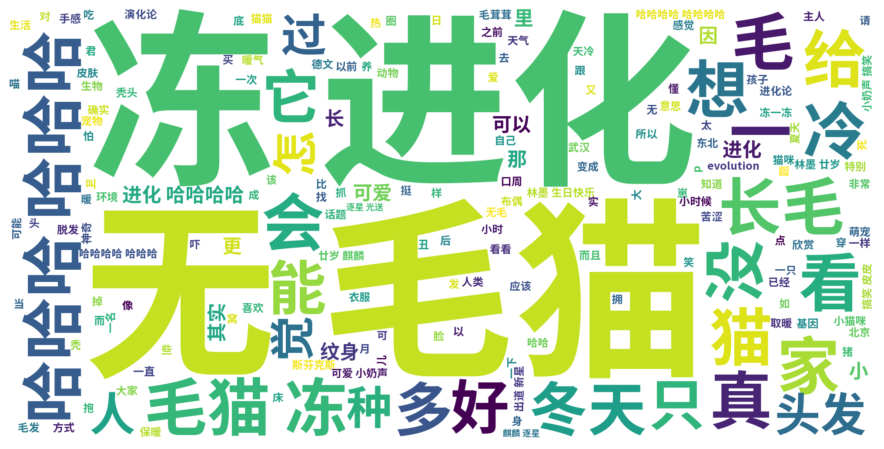

In [86]:
save_word_cloud = save_path + "/word_cloud.png"

# jieba 默认分词
raw_text = " ".join(jieba.cut(content))

# 自定义停词表，用于内容过滤
stop_words = {}.fromkeys(['的','啊','在','就','这','被','呢',
                         '到','和','也','是','那么','了','得',
                         '都','我','还','有','他','她','你','们',
                         '个','要','吗','说','或者','甚至','微','博',
                         '视','频','么','Mr','应该','那么','来','司',
                        '吧','因为','已经','成为','所以','现','但','把',
                        '着','甚至','与','上','起','什','再','很','年',
                         '为','从','让','不'])
# 使用停词表进行内容过滤
done_text = ''
for c in raw_text :
    if c not in stop_words:
        done_text += c
        
# 生成词云遮罩，决定词云图片大小
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# 中文内容必须导入中文字体，否则会乱码
font = 'assets/sourceHanSans.ttf'

# 词云设置与生成，并保存图片
wc = word_cloud(background_color="white", repeat=True, mask=None, font_path=font, scale=5)
wc.generate(done_text)
wc.to_file(save_word_cloud)

# 词云展示
plt.figure(figsize=(20, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()